# Data Summary Visualizations, OhmConnect Take Home Q 2b
<img src="https://login.ohmconnect.com/images/ohm/ohmconnect-logo-ui3.png" width="200">

| Who | What | Contact |
| --- | --- | --- |
| Kevin Moy | Notebook Owner | [<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Linkedin.svg/768px-Linkedin.svg.png" width="30">](https://www.linkedin.com/in/kevin-moy/) [<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/GitHub_logo_2013.svg/800px-GitHub_logo_2013.svg.png" width="60">](https://github.com/kwmoy) |



## Visualization 1: Boxplot distributions of attribute combinations – How do the attributes affect performance across events? (seaborn)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

files = ['event_performance_clean.csv','users.csv']

In [2]:
df_event_p = pd.read_csv(files[0])
df_users = pd.read_csv(files[1])

In [3]:
# Join both datasets in one dataframe

df_joined = df_event_p.join(df_users.set_index('userid'), on='userid')
df_joined.head()

,userid,date,hour,points,weather,attribute1,attribute2
0,4297f22d-1889-4b5b-80bb-cdaa6a8809bd,2019-09-13,19,-235,temperate,0,C
1,f072fcde-6466-4e10-b17c-de169c11fa1f,2019-09-13,20,-368,temperate,0,A
2,be5488aa-32c4-4897-a081-13de734c3a80,2019-09-13,19,121,temperate,0,B
3,9c6389a8-d335-4ca4-bdac-deac9b19f44d,2019-09-21,17,-119,temperate,0,A
4,4768df1a-5c78-44b4-b4cf-a46dfaf41d9c,2019-09-24,20,158,temperate,0,A


Text(0.5, 1.0, 'Points Distributions by Attribute1')

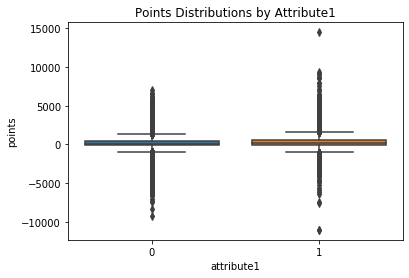

In [38]:
# Create visualizations for attribute1

sns.boxplot(x='attribute1',y='points',data=df_joined).set_title('Points Distributions by Attribute1')

Text(0.5, 1.0, 'Point Distributions by Attribute2')

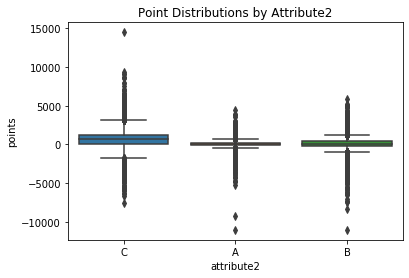

In [39]:
# Create visualizations for attribute2

sns.boxplot(x='attribute2',y='points',data=df_joined).set_title('Point Distributions by Attribute2')

## Visualization 2: Average performance and total performance across the year (vs San Jose weather across year if I have time) (line plot, mpl)

In [13]:
# Use a groupby to find average and total performance
df_joined['month'] = pd.DatetimeIndex(df_joined['date']).month
df_joined.head()

,userid,date,hour,points,weather,attribute1,attribute2,month
0,4297f22d-1889-4b5b-80bb-cdaa6a8809bd,2019-09-13,19,-235,temperate,0,C,9
1,f072fcde-6466-4e10-b17c-de169c11fa1f,2019-09-13,20,-368,temperate,0,A,9
2,be5488aa-32c4-4897-a081-13de734c3a80,2019-09-13,19,121,temperate,0,B,9
3,9c6389a8-d335-4ca4-bdac-deac9b19f44d,2019-09-21,17,-119,temperate,0,A,9
4,4768df1a-5c78-44b4-b4cf-a46dfaf41d9c,2019-09-24,20,158,temperate,0,A,9


In [27]:
# Summarize data by month

df_summarized = df_joined.groupby(by='month').agg({'points': ['mean','std']})
df_summarized.columns = ['points_mean','points_std']
df_summarized.reset_index(inplace=True)
df_summarized.head()




,month,points_mean,points_std
0,1,135.427200,846.532574
1,2,202.258466,800.776565
2,3,183.511857,678.758845
3,4,165.414551,757.708374
4,5,194.357934,719.893629


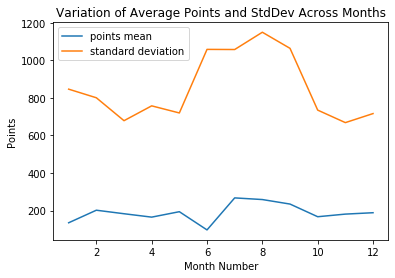

In [33]:
# Plot attribute means by month!

plt.plot(df_summarized['month'],df_summarized['points_mean'],label='points mean')
plt.plot(df_summarized['month'],df_summarized['points_std'],label='standard deviation')
plt.xlabel('Month Number')
plt.ylabel('Points')
plt.title('Variation of Average Points and StdDev Across Months')
plt.legend()
plt.show()

## Visualization 3: Hour effect on willingness to act in event (mean and stdev) (pandas and mpl)

In [34]:
# Summarize data by hour

df_summarized_hour = df_joined.groupby(by='hour').agg({'points': ['mean','std']})
df_summarized_hour.columns = ['points_mean','points_std']
df_summarized_hour.reset_index(inplace=True)
df_summarized_hour.head()




,hour,points_mean,points_std
0,16,233.945652,541.054018
1,17,228.271053,1094.012924
2,18,261.563441,1061.598200
3,19,191.125916,921.259961
4,20,156.091521,842.684102


C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


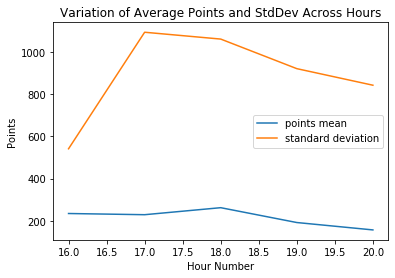

In [53]:
# Plot attribute means by hour!

plt.plot(df_summarized_hour['hour'],df_summarized_hour['points_mean'],label='points mean')
plt.plot(df_summarized_hour['hour'],df_summarized_hour['points_std'],label='standard deviation')
plt.xlabel('Hour Number')
plt.ylabel('Points')
plt.title('Variation of Average Points and StdDev Across Hours')
plt.legend()
plt.show()

# Statistical Test for Correlation, OhmConnect Q 2ei
<img src="https://login.ohmconnect.com/images/ohm/ohmconnect-logo-ui3.png" width="200">

In [45]:
# Create Joined dataframe with attribute2 as dummy variables

df_dummies = pd.get_dummies(df_joined['attribute2'],prefix='attribute2')
df_dummies.head()
df_joined_dummy = df_joined.join(df_dummies)
df_joined_dummy.head()


,userid,date,hour,points,weather,attribute1,attribute2,month,attribute2_A,attribute2_B,attribute2_C
0,4297f22d-1889-4b5b-80bb-cdaa6a8809bd,2019-09-13,19,-235,temperate,0,C,9,0,0,1
1,f072fcde-6466-4e10-b17c-de169c11fa1f,2019-09-13,20,-368,temperate,0,A,9,1,0,0
2,be5488aa-32c4-4897-a081-13de734c3a80,2019-09-13,19,121,temperate,0,B,9,0,1,0
3,9c6389a8-d335-4ca4-bdac-deac9b19f44d,2019-09-21,17,-119,temperate,0,A,9,1,0,0
4,4768df1a-5c78-44b4-b4cf-a46dfaf41d9c,2019-09-24,20,158,temperate,0,A,9,1,0,0


In [52]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# perform two-way ANOVA
model = ols('points ~ C(attribute1) + C(attribute2_A) + C(attribute2_C)', data=df_joined_dummy).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(attribute1),2.151781e+08,1.0,271.653193,8.144083e-61
C(attribute2_A),3.160654e+05,1.0,0.399019,5.276002e-01
C(attribute2_C),2.139447e+09,1.0,2700.960785,0.000000e+00
Residual,2.942278e+10,37145.0,NaN,NaN
